In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [13]:
import matplotlib.cm as cm 

In [30]:
from adjustText import adjust_text

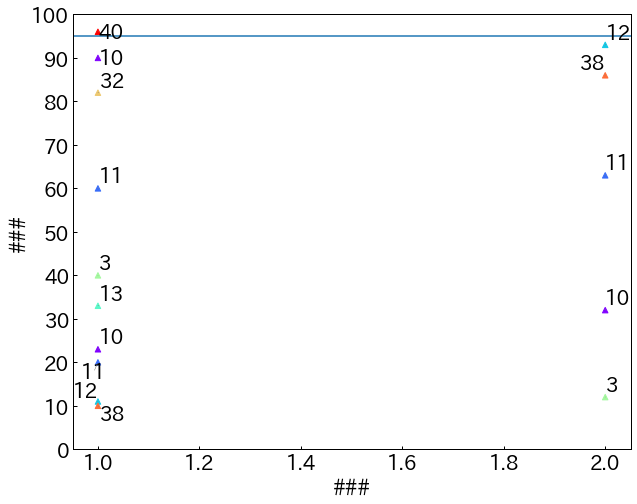

In [31]:
ratios = [[0.96,0.82,0.33,0.23,0.20,0.11,0.1,0.6,0.9,0.4],[0.93,0.86,0.63,0.32,0.12]]
true = [["40・12"],["38"]]
predicts = [["40","32","13","10","11","12","38","11","10","3"],["12","38","11","10","3"]]

labels = sorted(set([iii for i in predicts for ii in i for iii in ii.split("・")]))
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

colors_dic = {}
for i in range(len(labels)):
    colors_dic[labels[i]] = colors[i] 

index_ = [0,1]
#plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

for i in range(len(index_)):
    plt.scatter([i+1 for ii in range(len(ratios[index_[i]]))], [ii*100 for ii in ratios[index_[i]]], s=30, marker = "^",color =[colors_dic[ii] for ii in predicts[i]])

    for ii in range(len(ratios[index_[i]])):
        plt_text = ax.annotate(predicts[i][ii],xy = (i+1,ratios[index_[i]][ii]*100) )
        texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.axhline(y=95, xmin =0, xmax=len(index_))
plt.ylim(0,100,10)
plt.yticks(np.arange(0,101,10),np.arange(0,101,10))
plt.xlabel("###")
plt.ylabel("###")
plt.show()